In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Bidirectional, Embedding, GRU, Dense, LSTM, SimpleRNN
from sklearn.metrics import classification_report, confusion_matrix
# RNN, LSTM

In [18]:
max_features = 10000
maxlen = 500
batch_size = 32

In [19]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

In [20]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

Побудова простої **RNN** моделі:

In [21]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Компіляція та навчання моделі:

In [22]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.3)

Epoch 1/5
547/547 [==============================] - 58s 105ms/step - loss: 0.5849 - acc: 0.6718 - val_loss: 0.4441 - val_acc: 0.8004
Epoch 2/5
547/547 [==============================] - 62s 114ms/step - loss: 0.3653 - acc: 0.8469 - val_loss: 0.3778 - val_acc: 0.8396
Epoch 3/5
547/547 [==============================] - 56s 103ms/step - loss: 0.2887 - acc: 0.8849 - val_loss: 0.3659 - val_acc: 0.8515
Epoch 4/5
547/547 [==============================] - 67s 123ms/step - loss: 0.2305 - acc: 0.9098 - val_loss: 0.4256 - val_acc: 0.8169
Epoch 5/5
547/547 [==============================] - 62s 112ms/step - loss: 0.1776 - acc: 0.9329 - val_loss: 0.3995 - val_acc: 0.8513


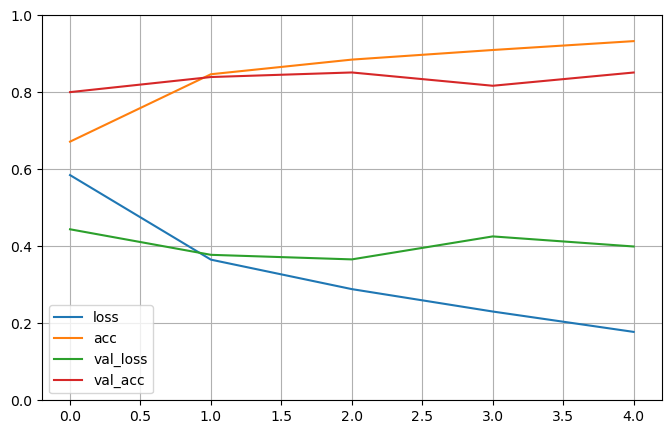

In [23]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Прогнозування та оцінка роботи моделі:

782/782 [==============================] - 21s 27ms/step
Predicted label: 0, True label: 0
Predicted label: 1, True label: 1
Predicted label: 0, True label: 1
Predicted label: 0, True label: 0
Predicted label: 1, True label: 1
Predicted label: 0, True label: 1
Predicted label: 1, True label: 1
Predicted label: 0, True label: 0
Predicted label: 1, True label: 0
Predicted label: 1, True label: 1
782/782 [==============================] - 21s 27ms/step - loss: 0.4053 - acc: 0.8475
Test loss: 0.4053
Test accuracy: 0.8475


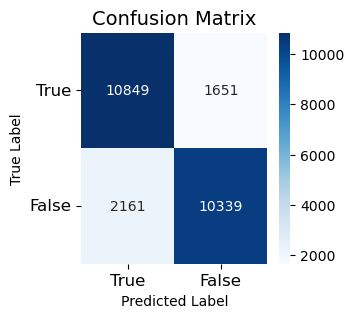

True Positive: 10849
True Negative: 10339
False Positive: 1651
False Negative: 2161
              precision    recall  f1-score   support

           0       0.83      0.87      0.85     12500
           1       0.86      0.83      0.84     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



In [24]:
predictions = model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Predicted label: {binary_predictions[i]}, True label: {y_test[i]}")

test_loss, test_accuracy = model.evaluate(input_test, y_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

cm = confusion_matrix(y_test, binary_predictions)
df1 = pd.DataFrame(columns=["True","False"], index= ["True","False"], data= cm ) 

f,ax = plt.subplots(figsize=(3,3))
sns.heatmap(df1, annot=True,cmap="Blues", fmt= '.0f',ax=ax)
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 14)
plt.show()

print ("True Positive:" , (cm[0,0]))
print ("True Negative:" , (cm[1,1]))
print ("False Positive:" , (cm[0,1]))
print ("False Negative:" , (cm[1,0]))

report = classification_report(y_test, binary_predictions)
print(report)

Побудова моделі **LSTM**:

In [25]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Компіляція та навчання моделі:

Epoch 1/5
547/547 [==============================] - 160s 286ms/step - loss: 0.1571 - acc: 0.9442 - val_loss: 0.3322 - val_acc: 0.8563
Epoch 2/5
547/547 [==============================] - 150s 274ms/step - loss: 0.1429 - acc: 0.9501 - val_loss: 0.3409 - val_acc: 0.8825
Epoch 3/5
547/547 [==============================] - 149s 272ms/step - loss: 0.1276 - acc: 0.9562 - val_loss: 0.3621 - val_acc: 0.8871
Epoch 4/5
547/547 [==============================] - 152s 278ms/step - loss: 0.1157 - acc: 0.9623 - val_loss: 0.3425 - val_acc: 0.8813
Epoch 5/5
547/547 [==============================] - 149s 272ms/step - loss: 0.1078 - acc: 0.9651 - val_loss: 0.3501 - val_acc: 0.8817


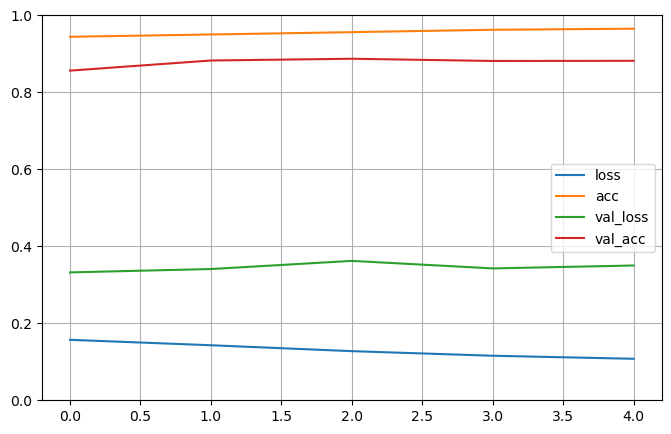

In [28]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.3)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Прогнозування та оцінка роботи моделі:

782/782 [==============================] - 46s 57ms/step
Predicted label: 0, True label: 0
Predicted label: 1, True label: 1
Predicted label: 1, True label: 1
Predicted label: 0, True label: 0
Predicted label: 1, True label: 1
Predicted label: 1, True label: 1
Predicted label: 1, True label: 1
Predicted label: 0, True label: 0
Predicted label: 1, True label: 0
Predicted label: 1, True label: 1
782/782 [==============================] - 48s 61ms/step - loss: 0.3936 - acc: 0.8670
Test loss: 0.3936
Test accuracy: 0.8670


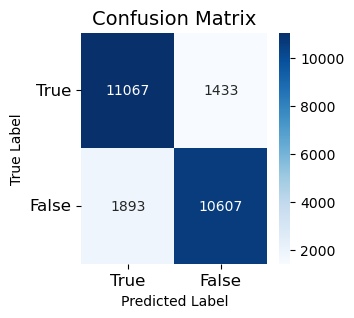

True Positive: 11067
True Negative: 10607
False Positive: 1433
False Negative: 1893
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     12500
           1       0.88      0.85      0.86     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



In [29]:
predictions = model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Predicted label: {binary_predictions[i]}, True label: {y_test[i]}")

test_loss, test_accuracy = model.evaluate(input_test, y_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

cm = confusion_matrix(y_test, binary_predictions)
df1 = pd.DataFrame(columns=["True","False"], index= ["True","False"], data= cm ) 

f,ax = plt.subplots(figsize=(3,3))
sns.heatmap(df1, annot=True,cmap="Blues", fmt= '.0f',ax=ax)
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 14)
plt.show()

print ("True Positive:" , (cm[0,0]))
print ("True Negative:" , (cm[1,1]))
print ("False Positive:" , (cm[0,1]))
print ("False Negative:" , (cm[1,0]))

report = classification_report(y_test, binary_predictions)
print(report)

Побудова моделі **Bidirectional RNN**:

In [30]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 336705 (1.28 MB)
Trainable params: 336705 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Компіляція та навчання моделі:

Epoch 1/5
547/547 [==============================] - 251s 332ms/step - loss: 0.4862 - acc: 0.7578 - val_loss: 0.3320 - val_acc: 0.8648
Epoch 2/5
547/547 [==============================] - 138s 252ms/step - loss: 0.2968 - acc: 0.8837 - val_loss: 0.3682 - val_acc: 0.8615
Epoch 3/5
547/547 [==============================] - 133s 243ms/step - loss: 0.2403 - acc: 0.9091 - val_loss: 0.2954 - val_acc: 0.8851
Epoch 4/5
547/547 [==============================] - 128s 233ms/step - loss: 0.2121 - acc: 0.9218 - val_loss: 0.3995 - val_acc: 0.8456
Epoch 5/5
547/547 [==============================] - 124s 227ms/step - loss: 0.1874 - acc: 0.9334 - val_loss: 0.3444 - val_acc: 0.8735


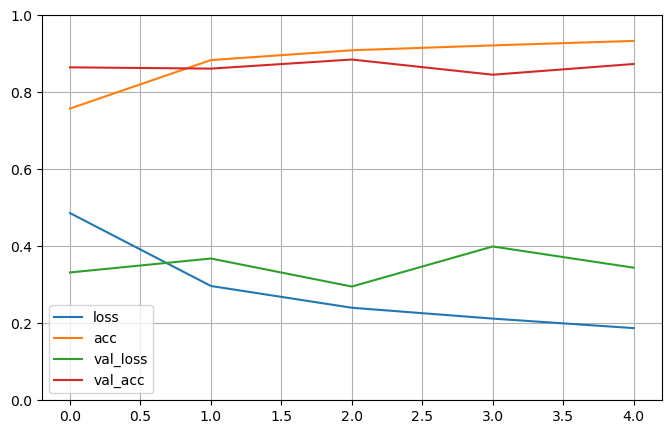

In [31]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.3)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Прогнозування та оцінка роботи моделі:

782/782 [==============================] - 49s 61ms/step
Predicted label: 0, True label: 0
Predicted label: 1, True label: 1
Predicted label: 0, True label: 1
Predicted label: 0, True label: 0
Predicted label: 1, True label: 1
Predicted label: 1, True label: 1
Predicted label: 1, True label: 1
Predicted label: 0, True label: 0
Predicted label: 1, True label: 0
Predicted label: 1, True label: 1
782/782 [==============================] - 51s 65ms/step - loss: 0.3810 - acc: 0.8576
Test loss: 0.3810
Test accuracy: 0.8576


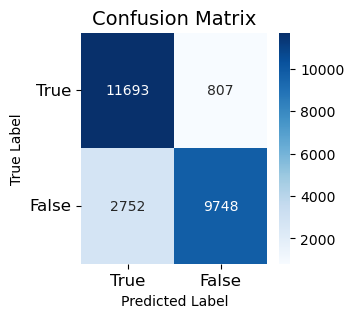

True Positive: 11693
True Negative: 9748
False Positive: 807
False Negative: 2752
              precision    recall  f1-score   support

           0       0.81      0.94      0.87     12500
           1       0.92      0.78      0.85     12500

    accuracy                           0.86     25000
   macro avg       0.87      0.86      0.86     25000
weighted avg       0.87      0.86      0.86     25000



In [32]:
predictions = model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Predicted label: {binary_predictions[i]}, True label: {y_test[i]}")

test_loss, test_accuracy = model.evaluate(input_test, y_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

cm = confusion_matrix(y_test, binary_predictions)
df1 = pd.DataFrame(columns=["True","False"], index= ["True","False"], data= cm ) 

f,ax = plt.subplots(figsize=(3,3))
sns.heatmap(df1, annot=True,cmap="Blues", fmt= '.0f',ax=ax)
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 14)
plt.show()

print ("True Positive:" , (cm[0,0]))
print ("True Negative:" , (cm[1,1]))
print ("False Positive:" , (cm[0,1]))
print ("False Negative:" , (cm[1,0]))

report = classification_report(y_test, binary_predictions)
print(report)

Побудова моделі **Deep RNN**:

In [33]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_4 (LSTM)               (None, None, 32)          8320      
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 336673 (1.28 MB)
Trainable params: 336673 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Компіляція та навчання моделі:

Epoch 1/5
547/547 [==============================] - 231s 409ms/step - loss: 0.4809 - acc: 0.7501 - val_loss: 0.3347 - val_acc: 0.8611
Epoch 2/5
547/547 [==============================] - 221s 404ms/step - loss: 0.2879 - acc: 0.8886 - val_loss: 0.3027 - val_acc: 0.8744
Epoch 3/5
547/547 [==============================] - 203s 371ms/step - loss: 0.2359 - acc: 0.9121 - val_loss: 0.5088 - val_acc: 0.8232
Epoch 4/5
547/547 [==============================] - 204s 373ms/step - loss: 0.2037 - acc: 0.9279 - val_loss: 0.2809 - val_acc: 0.8885
Epoch 5/5
547/547 [==============================] - 204s 372ms/step - loss: 0.1781 - acc: 0.9384 - val_loss: 0.3097 - val_acc: 0.8869


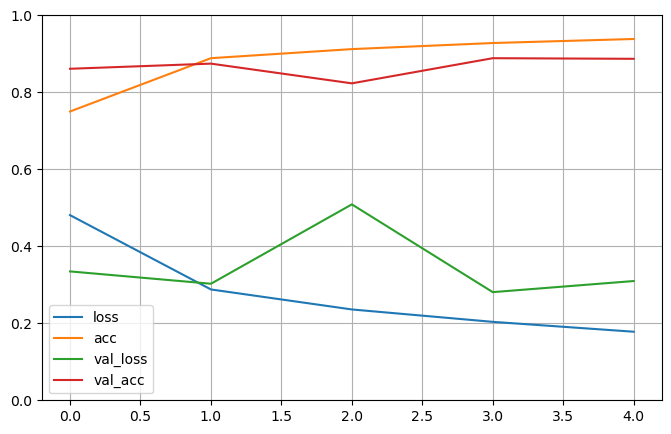

In [34]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.3)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Прогнозування та оцінка роботи моделі:

782/782 [==============================] - 104s 132ms/step
Predicted label: 0, True label: 0
Predicted label: 1, True label: 1
Predicted label: 0, True label: 1
Predicted label: 0, True label: 0
Predicted label: 1, True label: 1
Predicted label: 1, True label: 1
Predicted label: 1, True label: 1
Predicted label: 0, True label: 0
Predicted label: 1, True label: 0
Predicted label: 1, True label: 1
782/782 [==============================] - 95s 121ms/step - loss: 0.3401 - acc: 0.8751
Test loss: 0.3401
Test accuracy: 0.8751


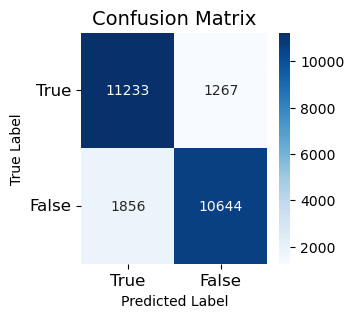

True Positive: 11233
True Negative: 10644
False Positive: 1267
False Negative: 1856
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     12500
           1       0.89      0.85      0.87     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



In [35]:
predictions = model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Predicted label: {binary_predictions[i]}, True label: {y_test[i]}")

test_loss, test_accuracy = model.evaluate(input_test, y_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

cm = confusion_matrix(y_test, binary_predictions)
df1 = pd.DataFrame(columns=["True","False"], index= ["True","False"], data= cm ) 

f,ax = plt.subplots(figsize=(3,3))
sns.heatmap(df1, annot=True,cmap="Blues", fmt= '.0f',ax=ax)
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 14)
plt.show()

print ("True Positive:" , (cm[0,0]))
print ("True Negative:" , (cm[1,1]))
print ("False Positive:" , (cm[0,1]))
print ("False Negative:" , (cm[1,0]))

report = classification_report(y_test, binary_predictions)
print(report)

В даному домашньому завданні ми вирішували задачу бінарної класифікації відгуків з датасету **imdb** на позитивні (1) та негативні (0) за допомогою рекурентної нейронної мережі. Для цього ми використали звичайну **Simple RNN, LSTM,** двонаправлену **BRNN** та глибоку **DRNN** нейромережу. Найвищу точність показали моделі, які містять у своєму складі **LSTM** шари.